<a href="https://colab.research.google.com/github/kjmobile/lb/blob/main/14_Neural_Network_2_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network 2: Deep Learning

In [8]:
# Import library and set seed
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [9]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [10]:
print(train_input[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [11]:
train_input[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

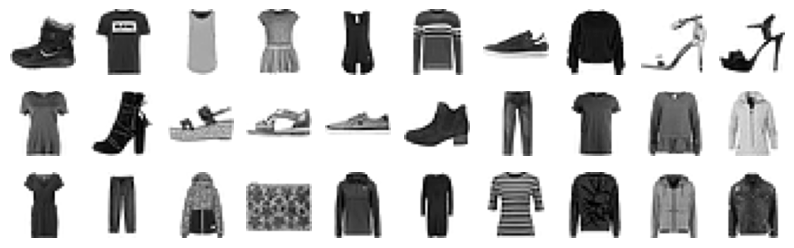

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 10, figsize=(10, 3))

for i in range(30):
    row = i // 10
    col = i % 10
    ax[row, col].imshow(train_input[i], cmap='gray_r')
    ax[row, col].axis('off')
plt.show()

### Preprocessing : Normalization and further dividing validation set

In [13]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28) #This reshape() can be replaced with the keras.flatten() layer as shown below

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

## Two layers

## Design a Deep Neural Network

In [14]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

In [15]:
model = keras.Sequential([dense1, dense2])

In [16]:
model.summary()

# We have two dense layers (aka, "hidden" layers), but you may experiment it by adding more layers
# The number of units('nodes' or 'neurons') of the first dense layer was set to 100.
# The rule of thumb is that the number should be at least larger than the size of the output layer
# The the number of units for the second layer is set to 10, softmax activation, because it is 10 -item multicategory classification task
# param # 78500 <= 784(input)*100 (units) + 100(bias terms)
# Then why 1010?
# Why output shape shows the sample count is None, why?: The number is left flexible in the model, since the fit() will use the 'mini-batch SGD' by default as optimizer and one batch size is set to 32.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## c.f., Alternative Syntax equivalent to above

In [17]:
model_1 = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion MNIST Model')

model_1.summary()

Model: "Fashion MNIST Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))


In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
import numpy as np
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([4798, 4781, 4795, 4816, 4798, 4789, 4782, 4841, 4803, 4797]))

In [21]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=10)
#loss function is set to 'sparse_categorical_crossentropy' because target value is set by integer rather than one-hot encoding.
#i.e., Keras will transform the target value into 'sparse' format before applying categorical crossentropy

#How many times of backpropagation occur in this model setting?

Epoch 1/10
1500/1500 [==============================] - 7s 3ms/step - loss: 0.5710 - accuracy: 0.8064
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4132 - accuracy: 0.8509
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3776 - accuracy: 0.8646
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3530 - accuracy: 0.8732
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3344 - accuracy: 0.8782
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3228 - accuracy: 0.8846
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3102 - accuracy: 0.8865
Epoch 8/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2999 - accuracy: 0.8906
Epoch 9/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2890 - accuracy: 0.8945
Epoch 10/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.280

In [22]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3337 - accuracy: 0.8822


[0.33367130160331726, 0.8821666836738586]

## Using ReLU, instead of Sigmoid, for as an activation function

In [23]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# ReLU is favored in image classification models over sigmoid due to its computational efficiency,
# requiring simpler calculations, and its mitigation of the vanishing gradient problem,
# ensuring gradients remain large and effective during backpropagation.

# In here we used keras's 'flatten' layer to reshape the input data without using train_scaled.reshape(-1, 28*28) as shown above.
# But since the flatten layer, only reshaped the input and did not contribute to learning, the model is still a neural net with the depth 2, not 3.


In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5290 - accuracy: 0.8113
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3920 - accuracy: 0.8576
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3525 - accuracy: 0.8726
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3301 - accuracy: 0.8821
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3141 - accuracy: 0.8867
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3061 - accuracy: 0.8918
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2945 - accuracy: 0.8946
Epoch 8/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2878 - accuracy: 0.8978
Epoch 9/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2796 - accuracy: 0.9014
Epoch 10/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.272

In [ ]:
model.evaluate(val_scaled, val_target)

## Optimizers: see the slides to compare them

In [ ]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')
# optimizer ='sgd' is short hand for below, which is exactly same as this.

In [ ]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=0.1) # But if we want to change the defualt learning rate,0.01, we need to explicitly intantiate an sgd object passing a relavant argument.

In [ ]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)
# modifying the SGD optimizer to momentum optimizer and then to nesterov momentum optimizer.
# in most cases,nesterov improves the performance the default sgd.

In [ ]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=10)

In [ ]:
model.evaluate(val_scaled, val_target)

#### In this model, what are the hyperparmaters that human researcher must determine?
- Number of Hidden Layers
- Number of neurons (units) in each hidden layer
- Choice of Activation Function
- Number of mini-batch size (by default it is set to 32 for the defaulted mini-batch SGD optimizer)